In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [18]:
from sklearn.feature_extraction.text  import CountVectorizer,TfidfTransformer 
model=CountVectorizer(ngram_range=(2,2)) # n-grams code for given word  

In [65]:
df=pd.read_csv("Reddit_Data.csv")

In [66]:
df.sample(4)

,clean_comment,category
6387,predictions india real growth increases china...,1
11344,indian government has been fighting for the fr...,1
26420,question don the makers need any permission fr...,-1
10158,sounds like nothing unusual modi but this real...,1


In [67]:
df['clean_comment'][3]


'what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha '

In [68]:
# given code has the model word  the type of data which i have tarinde on it  

In [69]:
# text preprocenssing of data for 
# for give word we have  
df['category'][3]

0

In [70]:
df[df['category'] == -1]['clean_comment'].head(3)

2    seriously don say thing first all they won get...
5    you should all sit down together and watch the...
8    there are two varieties christians dogmatic th...
Name: clean_comment, dtype: object

In [71]:
df['clean_comment'][8]

'there are two varieties christians dogmatic that dwell words and conservative that take heart the spirit the teachings hate oversimplify things but helps this understanding you are discussing with dogmatic religious people who live the letter the law will uphill battle wish you luck you are discussing with moderates exchange idea should come fairly easily comparing contrasting also discussing parallel teachings presented differently wouldn out the ordinary they may give you relevant spiritual advice even though you are not believer their religion '

In [72]:
df.shape

(37249, 2)

In [73]:
# preprocessing steps to geting 
#1) Text preproceing 
#2) html tag removing 
#3) tokensizer 
#4) limetinzetion 
#5) sping checks 
#6) emoji cheks 
#7) limteinzed 
import regex as re 
import string 
from textblob import TextBlob 
from nltk.corpus import stopwords
import emoji
from nltk.tokenize import sent_tokenize,word_tokenize
e=string.punctuation


def html_removing(text): 
    patten=re.compile("<.*?>")
    return patten.sub("",text)

def link_removing(text) : 
    patten =re.compile("https?://\S+|www\.\S+") 
    return patten.sub("",text)

def puction_removing(text) : 
    for i in e :
        text.replace(i,"")

def spelling_checker(incorrt_text):
    correct_text=TextBlob(incorrt_text)
    return correct_text.correct 

def  remove_stopword(text): 
    new_text= []
    for word in text.split() : 
        if word in stopwords.words('english'): 
            new_text.append('')
        else : 
            new_text.append(word)
    x = new_text[:]
    new_text.clear() 
    return " ".join(x)  


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def count_emojis_inDataFame(text):
    emoji_counts = {}
    for char in text:
        if emoji.is_emoji(char): 
            emoji_counts[char] = emoji_counts.get(char, 0) + 1
    return emoji_counts


def Tokenzies(text): 
    return word_tokenize(text)

def Sent_Tokenzies(Sent) : 
    return Sent_Tokenzies(sent)

In [74]:
p ="<h1>ram is my freind </h1>"
html_removing(p)

'ram is my freind '

In [75]:
p="the my word www.mycom.com"
link_removing(p)

'the my word '

In [76]:
r="ram is doning the coding in the way for given for into" 
remove_stopword(r)

'ram  doning  coding   way  given  '

In [77]:
remove_emoji("Loved the movie. It was 😘😘") 

'Loved the movie. It was '

In [78]:
remove_emoji("my good way for 😍😌😌")

'my good way for '

In [79]:
remove_emoji("my good way for 😍😌😌")

'my good way for '

In [80]:
# fro give the wordind 
# feature Extarion 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [81]:
cont = CountVectorizer()
tfi_df =TfidfVectorizer()

In [82]:
df.shape

(37249, 2)

In [83]:
df=df.iloc[:5000,:]

In [84]:
df.shape

(5000, 2)

In [85]:
df.sample(3)

,clean_comment,category
4881,what made you think shelterer mass murderers w...,1
1333,here good graphic which have way verifying not...,1
3370,another user feels betrayed and wounded becaus...,1


In [87]:
df=df.dropna()

In [88]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [89]:
df['category'].value_counts()

category
 1    2257
 0    1624
-1    1110
Name: count, dtype: int64

<Axes: xlabel='category'>

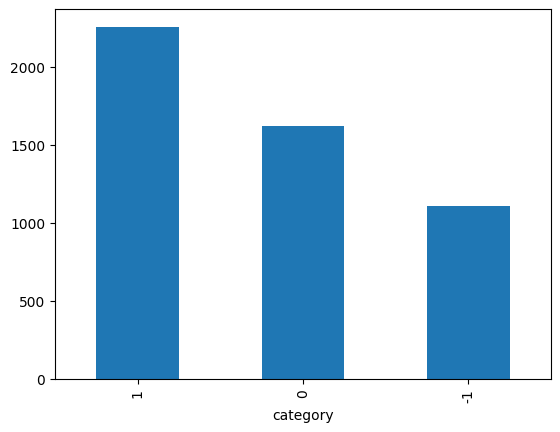

In [90]:
import matplotlib.pyplot as plt
df['category'].value_counts().plot(kind='bar')

In [91]:
X=df['clean_comment']
y=df['category']

In [92]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [93]:
len(y_train)

3992

In [94]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()
X_train_bow=cv.fit_transform(X_train).toarray()
X_test_bow=cv.transform(X_test).toarray()

In [95]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB 
clf1=GaussianNB()
clf2=MultinomialNB()

In [98]:
clf1.fit(X_train_bow,y_train)

GaussianNB()

In [99]:
y_pre=clf1.predict(X_test_bow)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.5495495495495496

In [101]:
clf2.fit(X_train_bow,y_train)

MultinomialNB()

In [103]:
y_pre=clf2.predict(X_test_bow)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.5865865865865866